## 1. CIFAR10 데이터셋 살펴보기

In [3]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

In [4]:
training_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


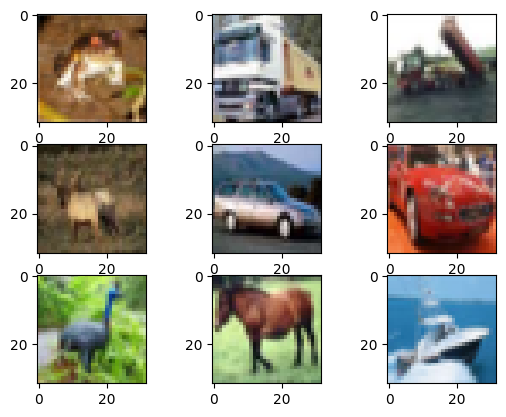

In [5]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i])
plt.show()

## 2. 데이터 전처리에 crop, flip 추가

In [20]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.datasets.cifar import CIFAR10

In [21]:
transforms = T.Compose(
    [T.ToPILImage(),
     T.RandomCrop((32,32), padding=4),
     T.RandomHorizontalFlip(p=0.5)]
)

In [22]:
training_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=transforms
)

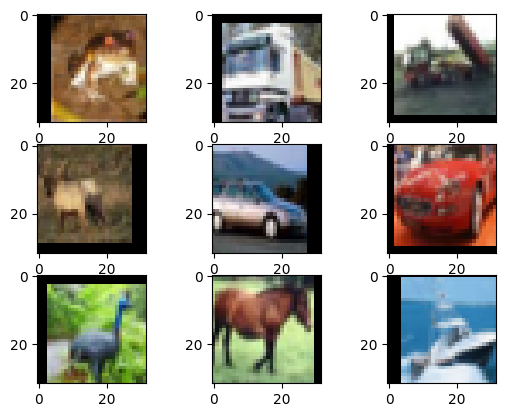

In [24]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(transforms(training_data.data[i]))
plt.show()

## 3. 데이터 전처리에 정규화를 추가

In [25]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.datasets.cifar import CIFAR10

In [28]:
transforms = T.Compose(
    [T.ToPILImage(),
     T.RandomCrop((32,32), padding=4),
     T.RandomHorizontalFlip(p=0.5),
     T.ToTensor(),
     T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
     T.ToPILImage()]
)

training_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=transforms
)

test_data = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=transforms
)

Files already downloaded and verified
Files already downloaded and verified


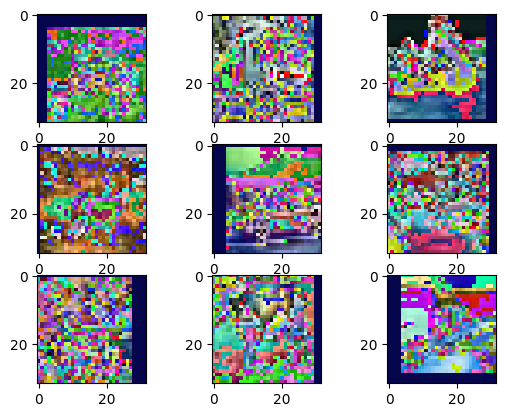

In [29]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(transforms(training_data.data[i]))
plt.show()

## 4. 데이터셋의 평균과 표준편차

In [32]:
import torch

training_data = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=ToTensor()
)

imgs = [item[0] for item in training_data]
labels = [item[1] for item in training_data]

imgs[0], labels[0]

Files already downloaded and verified


(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [33]:
imgs = torch.stack(imgs, dim=0).numpy()
print(imgs.shape, type(imgs))

(50000, 3, 32, 32) <class 'numpy.ndarray'>


In [35]:
mean_r = imgs[:, 0, :, :].mean()
mean_g = imgs[:, 1, :, :].mean()
mean_b = imgs[:, 2, :, :].mean()

std_r = imgs[:, 0, :, :].std()
std_g = imgs[:, 1, :, :].std()
std_b = imgs[:, 2, :, :].std()

print(mean_r, mean_g, mean_b)
print(std_r, std_g, std_b)

0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


## 5. VGG기본 블록 정의

In [36]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, hidden_dim):
        super(BasicBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, hidden_dim, kernel_size=3, padding=1) # same padding
        self.conv2 = nn.Conv2d(hidden_dim, out_channels, kernel_size=3, padding=1) # same padding
        self.relu = nn.ReLU()
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        return x

## 6. VGG 모델 정의하기

In [41]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        
        self.block1 = BasicBlock(in_channels=3, out_channels=32, hidden_dim=16)
        self.block2 = BasicBlock(in_channels=32, out_channels=128, hidden_dim=64)
        self.block3 = BasicBlock(in_channels=128, out_channels=256, hidden_dim=128)
        
        self.fc1 = nn.Linear(in_features=4096, out_features=2048)
        self.fc2 = nn.Linear(in_features=2048, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=num_classes)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = torch.flatten(x, start_dim=1)
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        
        return x

## 7. DataLoader 및 모델 정의

In [42]:
from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam

transforms = T.Compose([
    T.RandomCrop((32,32), padding=4),
    T.RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
])

training_data = CIFAR10(root='./', download=True, train=True, transform=transforms)
test_data = CIFAR10(root='./', download=True, train=False, transform=transforms)


train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

device = 'cuda' if torch.cuda.is_available() else "cpu"

model = CNN(num_classes=10)

model.to(device)

Files already downloaded and verified
Files already downloaded and verified


CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

## 8. 모델 학습하기

In [43]:
lr = 1e-3

optim = Adam(model.parameters(), lr=lr)

for epoch in range(100):
    for data, label in train_loader:
        optim.zero_grad()
        
        preds = model(data.to(device))
        
        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()
        
    if epoch==0 or epoch%10 == 9:
        print(f"epoch{epoch+1}, loss:{loss.item()}")
        
torch.save(model.state_dict(), "CIFAR.pth")

epoch1, loss:1.444604754447937
epoch11, loss:0.7678802609443665
epoch21, loss:0.49380558729171753
epoch31, loss:0.26777440309524536
epoch41, loss:0.39305001497268677
epoch51, loss:0.08820068836212158
epoch61, loss:0.7144308686256409
epoch71, loss:0.8839986324310303
epoch81, loss:0.01846974343061447
epoch91, loss:0.35380247235298157


In [44]:
model.load_state_dict(torch.load("CIFAR.pth", map_location=device))

num_corr = 0

with torch.no_grad():
    for data, label in test_loader:
        output = model(data.to(device))
        preds = output.data.max(1)[1]
        corr = preds.eq(label.to(device).data).sum().item()
        num_corr += corr
    
    print(f"Accuracy: {num_corr/len(test_data)}")

Accuracy: 0.7473
